# Predict Sentiment Analysis

### IMDB Movie Review Sentiment Problem Description

The dataset is the Large Movie Review Dataset often referred to as the IMDB dataset.

The Large Movie Review Dataset (often referred to as the IMDB dataset) contains 25,000 highly polar moving reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given moving review has a positive or negative sentiment.

The data was collected by Stanford researchers and was used in a 2011 paper [PDF] where a split of 50/50 of the data was used for training and test. An accuracy of 88.89% was achieved.

The data was also used as the basis for a Kaggle competition titled “Bag of Words Meets Bags of Popcorn” in late 2014 to early 2015. Accuracy was achieved above 97% with winners achieving 99%.



In [1]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

Using TensorFlow backend.


65511424/65552540 [============================>.] - ETA: 0s

In [2]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [3]:
# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [4]:
# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


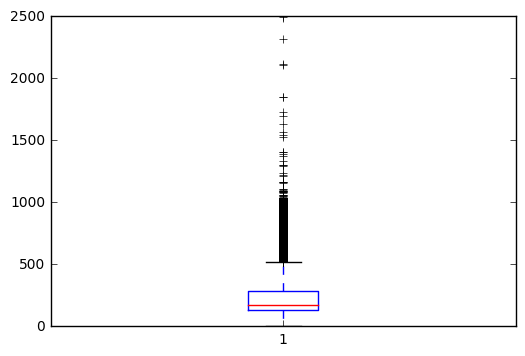

In [5]:
# Summarize review length
print("Review length: ")
result = map(len, X)
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

## Word Embeddings

A recent breakthrough in the field of natural language processing is called word embedding.

This is a technique where words are encoded as real-valued vectors in a high dimensional space, where the similarity between words in terms of meaning translates to closeness in the vector space.

Discrete words are mapped to vectors of continuous numbers. This is useful when working with natural language problems with neural networks and deep learning models are we require numbers as input.

Keras provides a convenient way to convert positive integer representations of words into a word embedding by an Embedding layer.

The layer takes arguments that define the mapping including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value that will be seen as an integer). The layer also allows you to specify the dimensionality for each word vector, called the output dimension.

We would like to use a word embedding representation for the IMDB dataset.

Let’s say that we are only interested in the first 5,000 most used words in the dataset. Therefore our vocabulary size will be 5,000. We can choose to use a 32-dimension vector to represent each word. Finally, we may choose to cap the maximum review length at 500 words, truncating reviews longer than that and padding reviews shorter than that with 0 values.

We would load the IMDB dataset as follows:

In [12]:
imdb.load_data(nb_words=500)

((array([ [1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32],
         [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69

### Simple Multi-Layer Perceptron Model for the IMDB Dataset

In [14]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [31]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

In [32]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [33]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
#model.add(Dense(256, input_dim=max_words))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_3 (Embedding)          (None, 500, 32)       160000      embedding_input_3[0][0]          
____________________________________________________________________________________________________
flatten_5 (Flatten)              (None, 16000)         0           embedding_3[0][0]                
____________________________________________________________________________________________________
dense_19 (Dense)                 (None, 30)            480030      flatten_5[0][0]                  
____________________________________________________________________________________________________
dense_20 (Dense)                 (None, 30)            930         dense_19[0][0]                   
___________________________________________________________________________________________

In [34]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=4, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 12s - loss: 0.4832 - acc: 0.7336 - val_loss: 0.3191 - val_acc: 0.8634
Epoch 2/4
25000/25000 [==============================] - 14s - loss: 0.1912 - acc: 0.9282 - val_loss: 0.3332 - val_acc: 0.8674
Epoch 3/4
25000/25000 [==============================] - 11s - loss: 0.0657 - acc: 0.9812 - val_loss: 0.4192 - val_acc: 0.8626
Epoch 4/4
25000/25000 [==============================] - 12s - loss: 0.0141 - acc: 0.9971 - val_loss: 0.5548 - val_acc: 0.8620
Accuracy: 86.20%


### One-Dimensional Convolutional Neural Network Model for the IMDB Dataset

In [27]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [28]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [29]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_5 (Embedding)          (None, 500, 32)       160000      embedding_input_5[0][0]          
____________________________________________________________________________________________________
convolution1d_2 (Convolution1D)  (None, 500, 32)       3104        embedding_5[0][0]                
____________________________________________________________________________________________________
maxpooling1d_2 (MaxPooling1D)    (None, 250, 32)       0           convolution1d_2[0][0]            
____________________________________________________________________________________________________
flatten_5 (Flatten)              (None, 8000)          0           maxpooling1d_2[0][0]             
___________________________________________________________________________________________

In [30]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 239s - loss: 0.4257 - acc: 0.7768 - val_loss: 0.2825 - val_acc: 0.8815
Epoch 2/2
25000/25000 [==============================] - 243s - loss: 0.2172 - acc: 0.9153 - val_loss: 0.2813 - val_acc: 0.8839
Accuracy: 88.39%
